### Importing required packages

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Getting the image dataset (MNIST dataset)

In [2]:
images = pd.read_csv('Assets/images.csv')
images = images.T
images = [np.array(images[i]).reshape(28,28) for i in range(999)]
images = np.array(images)


In [3]:
images[0].shape

(28, 28)

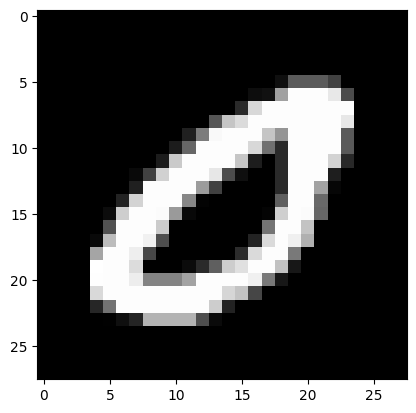

In [4]:
plt.imshow(images[0], cmap = 'gray')

In [5]:
images = images / 255.0

In [6]:
images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Model

In [7]:
encoder_input = keras.Input(shape = (28, 28, 1), name = 'image')
flatten_enc_input = keras.layers.Flatten()(encoder_input)  #flatten to 784
encoder_output = keras.layers.Dense(64, activation = 'relu')(flatten_enc_input)

encoder = keras.Model(encoder_input, encoder_output, name = 'encoder')

decoder_input = keras.layers.Dense(784, activation = 'relu')(encoder_output)
decoder_output = keras.layers.Reshape((28, 28, 1))(decoder_input)

opt = keras.optimizers.Adam(learning_rate = 0.001, weight_decay = 1e-6)

autoencoder = keras.Model(encoder_input, decoder_output, name = 'autoencoder')
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ image (InputLayer)              │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        50,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,200 (395.31 KB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
autoencoder.compile(optimizer = opt, loss = 'mse')

### Training the above model on the image dataset

In [9]:
autoencoder.fit(images, images, epochs = 3, batch_size = 32, validation_split = 0.1)

Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0942 - val_loss: 0.0605
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0594 - val_loss: 0.0476
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0445 - val_loss: 0.0392


## Checking the validity of the model

### Importing the test image

In [10]:
test_images = pd.read_csv('Assets/test_images.csv')
test_images = test_images.T
test_images = [np.array(test_images[i]).reshape(28,28) for i in range(349)]
test_images = np.array(test_images)
test_images = test_images / 255.0

In [11]:
test_images.shape

(349, 28, 28)

### Check how the autoencoder reconstructs one of the image

In [12]:
sample = encoder.predict(test_images[1].reshape(-1, 28, 28, 1))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


### The sample data


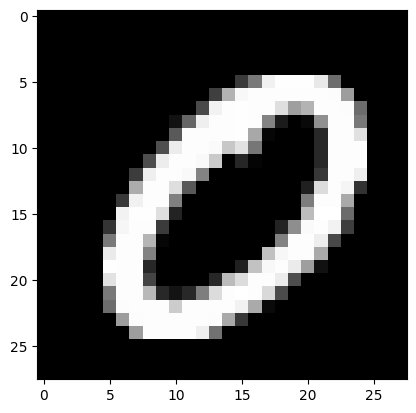

In [13]:
plt.imshow(test_images[1], cmap = 'gray')

### Encoded data

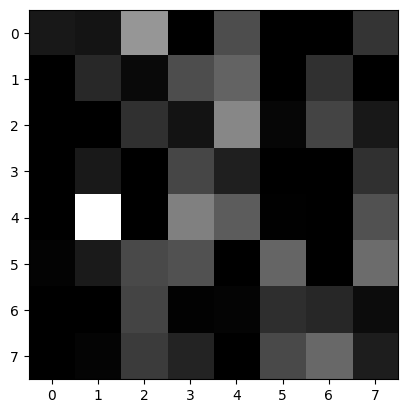

In [14]:
plt.imshow(sample.reshape(8,8), cmap = 'gray')

### The reconstructed data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


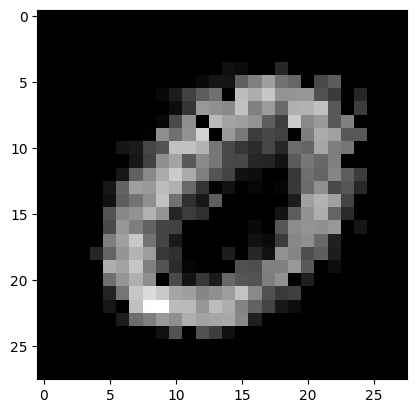

In [15]:
auto_encoded_image = autoencoder.predict(test_images[1].reshape(-1, 28 ,28, 1))[0]
plt.imshow(auto_encoded_image, cmap = 'gray')

### Our model is able to reconstruct the original image through a bottle neck hidden layer, hence we can compress the original data and can be reconstructed using this compressed data

In [117]:
## Denoising autoencoders
